In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io

%load_ext autoreload
%autoreload 2

data = scipy.io.loadmat('./data/SoundSourceData.mat')

X = data['X']
F = data['F']

n, p = X.shape
m = F.shape[0]

print(X.shape)
print(F.shape)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(20, 1000)
(4, 1000)


In [18]:
# Set equal to zero, all negative elements of X
X = np.where(X<0, 0, X)

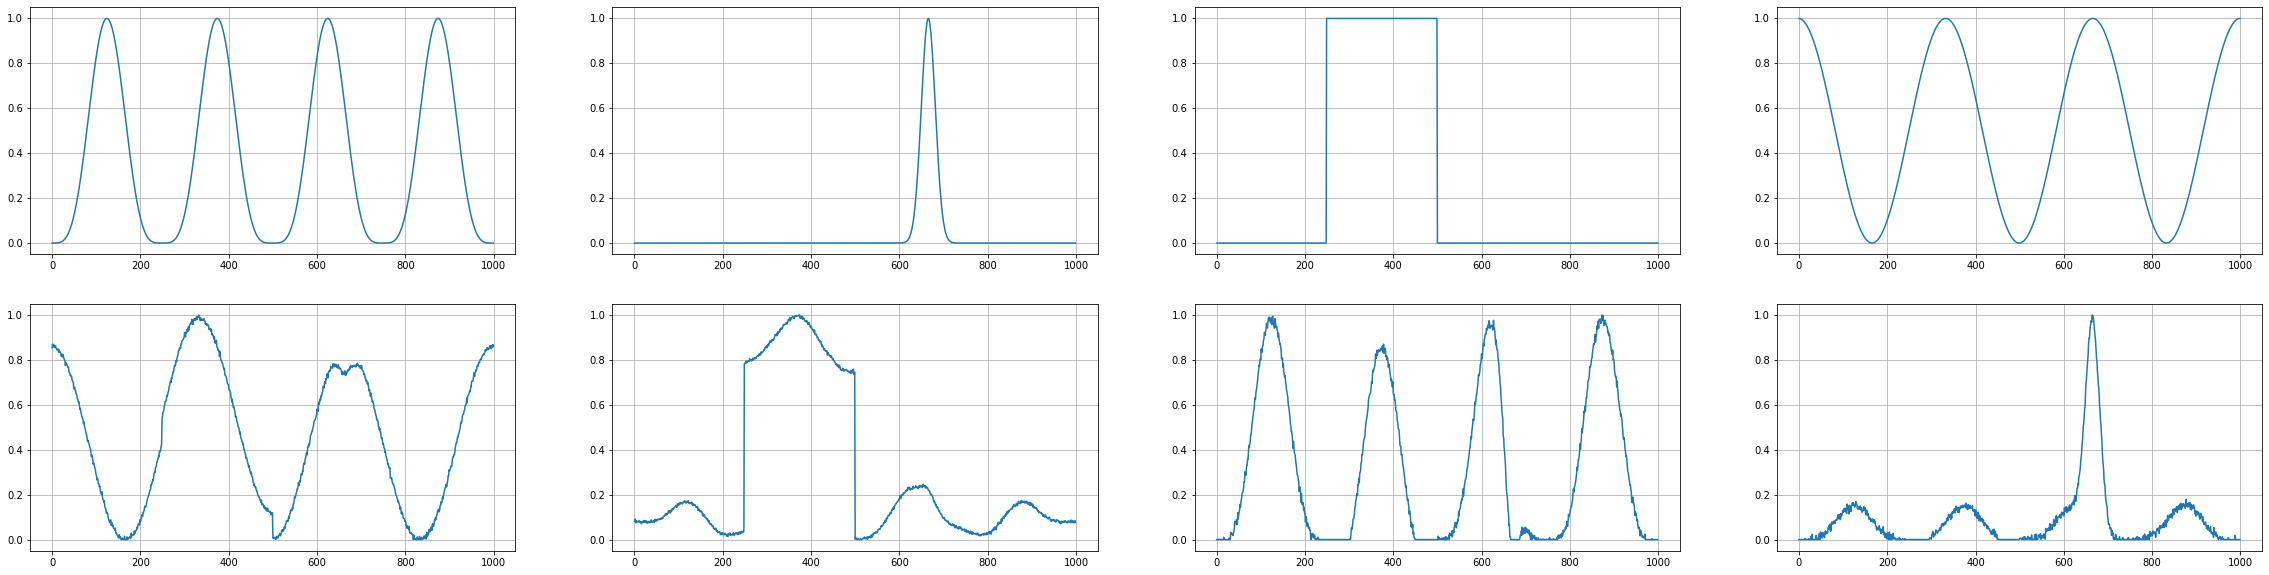

In [78]:
from utils.NMF import NMF as nmf
# m=5
W, H = nmf(X, m, T=5)

plt.figure(figsize=(40, 10))
for i in range(m):
    plt.subplot(2, m, i+1)
    plt.plot(F[i, :])
    plt.grid()
for i in range(m):
    plt.subplot(2, m, m+i+1)
    plt.plot(H[i, :])
    plt.grid()
plt.show() 

Repeat with different m (eg. m=3, m=5) and comment.

In [39]:
err = {}
max_iter = 1000
tau=[1e-2, 1e-3, 1e-4]
for t in tau:
    _, e = nmf(X, m, T=max_iter, tau=t, return_error=True)

    err[t] = e


Correct!
Correct!
Correct!


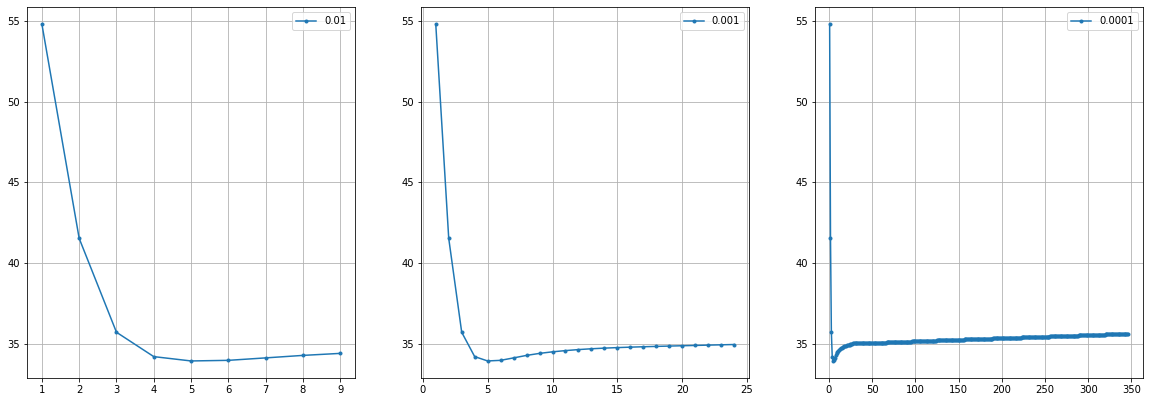

In [40]:
# Plot error

plt.figure(figsize=(20, 15))
for i in range(len(tau)):
    plt.subplot(2, len(tau), i+1)
    plt.plot(range(1, len(err[tau[i]]) + 1), err[tau[i]], '.-', label=tau[i])
    plt.grid()
    plt.legend()
plt.show() 

sci-kit nmf

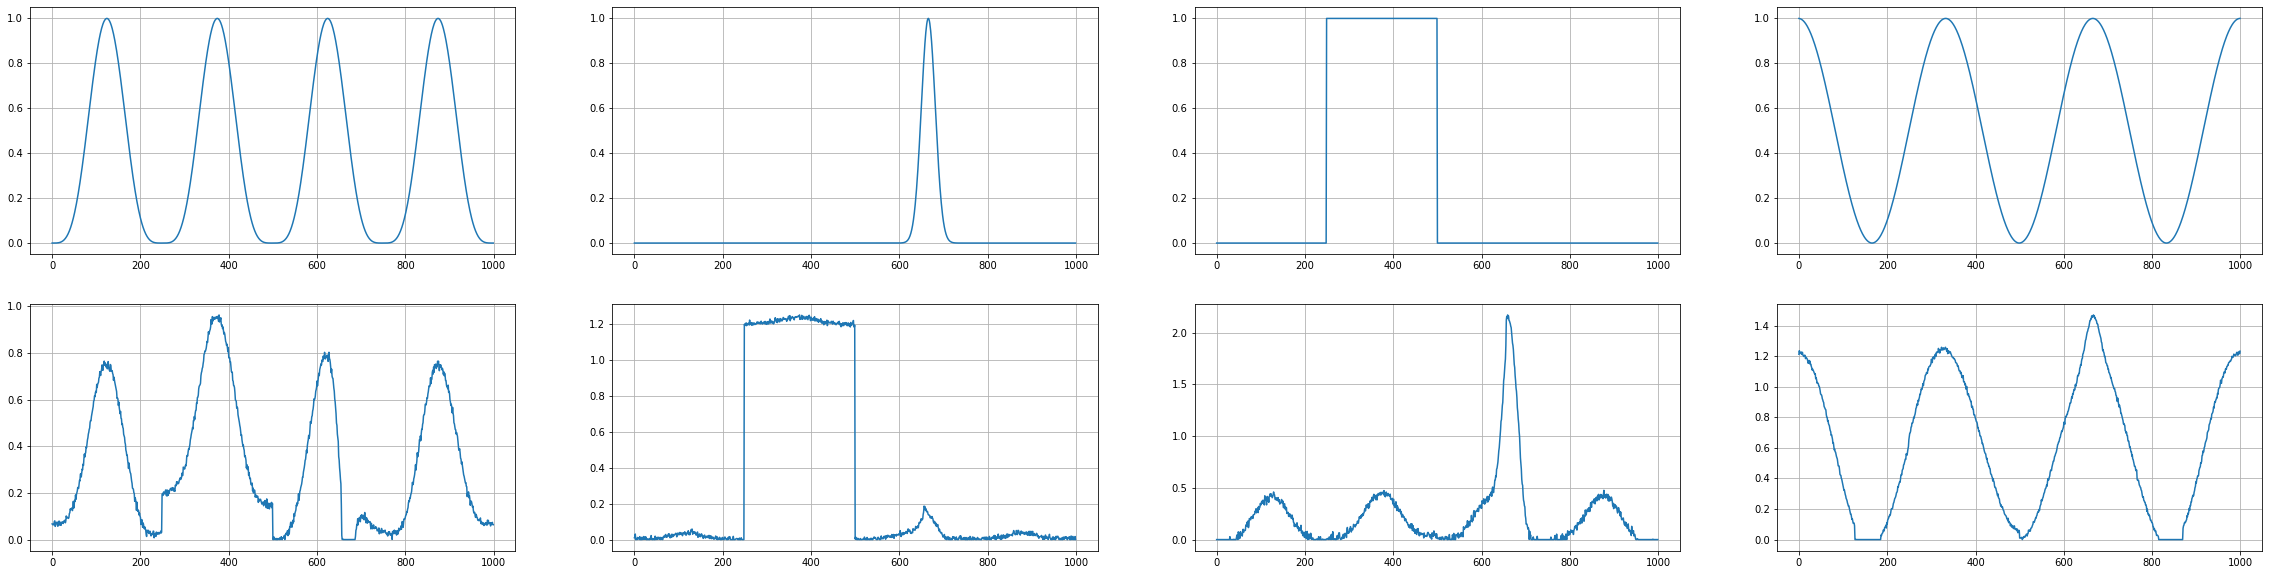

In [28]:
from sklearn.decomposition import NMF

model = NMF(n_components=4, solver='mu', init='random', random_state=42, max_iter=10000) # the 4 components are the 4 microphones
model.fit(X)
H = model.components_

plt.figure(figsize=(40, 10))
for i in range(m):
    plt.subplot(2, m, i+1)
    plt.plot(F[i, :])
    plt.grid()
for i in range(m):
    plt.subplot(2, m, m+i+1)
    plt.plot(H[i, :])
    plt.grid()
plt.show() 

In [57]:
err_sk.keys()

dict_keys(['cd', 'mu'])

In [74]:
err_sk = {}
solver = ['cd','mu']
iter = 1000
for s in solver:
    e=[]
    for t in range(iter):
        model = NMF(n_components=4, solver=s, init='random', random_state=42, max_iter=t+1); # the 4 components are the 4 microphones
        model.fit(X)
        e.append(model.reconstruction_err_)
    err_sk[s] = e

In [76]:
print(np.argmin(err_sk['mu']))
print(min(err_sk['mu']))
print(np.argmin(err_sk['cd']))
print(min(err_sk['cd']))

469
2.860722596656352
264
2.515125095344936


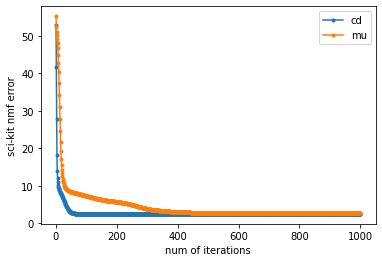

In [75]:
# Plot error
fig = plt.figure()
for k, v in err_sk.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label=k)

plt.legend()
plt.xlabel('num of iterations')
plt.ylabel('sci-kit nmf error')
plt.show()